## Coronavirus disease (COVID-19)
Analysis of Database of publications on 4th March 2020 by Johns Hopkins University Center

![](https://www.who.int/images/default-source/health-topics/coronavirus/corona-virus-getty.tmb-1920v.jpg?Culture=en&amp;sfvrsn=217a6a68_6&quot)

### Description:

Coronaviruses (CoV) are a large family of viruses that cause illness ranging from the common cold to more severe diseases such as Middle East Respiratory Syndrome (MERS-CoV) and Severe Acute Respiratory Syndrome (SARS-CoV). A novel coronavirus (nCoV) is a new strain that has not been previously identified in humans.

Common signs of infection include respiratory symptoms, fever, cough, shortness of breath and breathing difficulties. In more severe cases, infection can cause pneumonia, severe acute respiratory syndrome, kidney failure and even death. 

By- World Health Organization

### Data Source

https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases

The data is compiled by the Johns Hopkins University Center for Systems Science and Engineering (JHU CCSE) from various sources including the World Health Organization (WHO), DXY.cn. Pneumonia. 2020, BNO News, National Health Commission of the People’s Republic of China (NHC), China CDC (CCDC), Hong Kong Department of Health, Macau Government, Taiwan CDC, US CDC, Government of Canada, Australia Government Department of Health, European Centre for Disease Prevention and Control (ECDC), Ministry of Health Singapore (MOH)

### Importing libraries

In [1]:
#Processing
import numpy as np # linear algebra
import pandas as pd # data analysis , CSV file I/O (e.g. pd.read_csv)

#Visualization
import seaborn as sns
import plotly.express as px # plotting library
import matplotlib.pyplot as plt # plotting library
import folium # plotting library
import folium.plugins as plugins
import geopandas as gpd
from folium.plugins import TimestampedGeoJson
%matplotlib inline 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes

#!conda install -c conda-forge googlemaps
#print('Folium installed')
#print('Libraries imported.')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Libraries imported.
/kaggle/input/coronavirus-4th-mar-2020-johns-hopkins-university/COVID-19-Confirmed (4th March2020).csv
/kaggle/input/coronavirus-4th-mar-2020-johns-hopkins-university/COVID-19-Death (4th March2020).csv
/kaggle/input/coronavirus-4th-mar-2020-johns-hopkins-university/COVID-19-Recovered (4th March2020).csv


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.



In [2]:
COVID_confirmed = pd.read_csv("../input/coronavirus-4th-mar-2020-johns-hopkins-university/COVID-19-Confirmed (4th March2020).csv")
COVID_death = pd.read_csv("../input/coronavirus-4th-mar-2020-johns-hopkins-university/COVID-19-Death (4th March2020).csv")
COVID_recovered = pd.read_csv("../input/coronavirus-4th-mar-2020-johns-hopkins-university/COVID-19-Recovered (4th March2020).csv")

In [3]:
COVID_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,03-01-2020,03-02-2020,03-03-2020,03-04-2020
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,989,989,989,989,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,399,400,400,410,410,411,413,414,414,418
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,293,294,294,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,91,91,91,91,91


In [4]:
COVID_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 47 columns):
Province/State    82 non-null object
Country/Region    160 non-null object
Lat               160 non-null float64
Long              160 non-null float64
1/22/20           160 non-null int64
1/23/20           160 non-null int64
1/24/20           160 non-null int64
1/25/20           160 non-null int64
1/26/20           160 non-null int64
1/27/20           160 non-null int64
1/28/20           160 non-null int64
1/29/20           160 non-null int64
1/30/20           160 non-null int64
1/31/20           160 non-null int64
02-01-2020        160 non-null int64
02-02-2020        160 non-null int64
02-03-2020        160 non-null int64
02-04-2020        160 non-null int64
02-05-2020        160 non-null int64
02-06-2020        160 non-null int64
02-07-2020        160 non-null int64
02-08-2020        160 non-null int64
02-09-2020        160 non-null int64
02-10-2020        160 non-null int64
02

COVID_confirmed

Plotly Python Open Source Graphing Library
https://plot.ly/python/

In [5]:
fig = px.bar(COVID_confirmed, x="Country/Region", y="2/26/20")
fig.show()

In [6]:
d=COVID_confirmed['Country/Region'].unique()

Forming clusters according to countries

In [7]:
#arr contains index list as per Country/Region
arr=[]
for i in d:
    k=list(COVID_confirmed.loc[COVID_confirmed['Country/Region']==i].index)
    arr.append(k)

In [8]:
# Dates in list
dates= list(COVID_confirmed.columns[5:])

In [9]:
# Folium plugins
from folium import IFrame
from folium.plugins import MarkerCluster
from folium.plugins import HeatMapWithTime
from folium.plugins import TimestampedGeoJson    

# Define initial location
map_world = folium.Map(
    location=[56.096555, -3.64746],
    tiles='cartodbpositron',
    zoom_start=5,
)

# storing coordinates, popup, time in features list

features=[]
for date in dates:
    for col in range(COVID_confirmed.shape[0]):
        features.append(
        {'type': 'Feature',
         'geometry': {'type': 'Point','coordinates': [COVID_confirmed['Long'][col],COVID_confirmed['Lat'][col]]},
         'properties': {'time': date,'icon': 'circle','popup':'<b>Country:{}</b><br>Confirmed:{}<br>Death:{}<br>Recovered:{}'.format(COVID_confirmed['Country/Region'][col],COVID_confirmed[date][col],COVID_death[date][col],COVID_recovered[date][col])}})

TimestampedGeoJson(
    {'type': 'FeatureCollection', 'features': features},
            period='P1D',
            auto_play=False,
            min_speed=0.5,
            max_speed=2,
            loop=False,
            loop_button=True,
            date_options='DD/MM/YYYY',
            ).add_to(map_world)

map_world

## Interactive Folium Map with Date slider

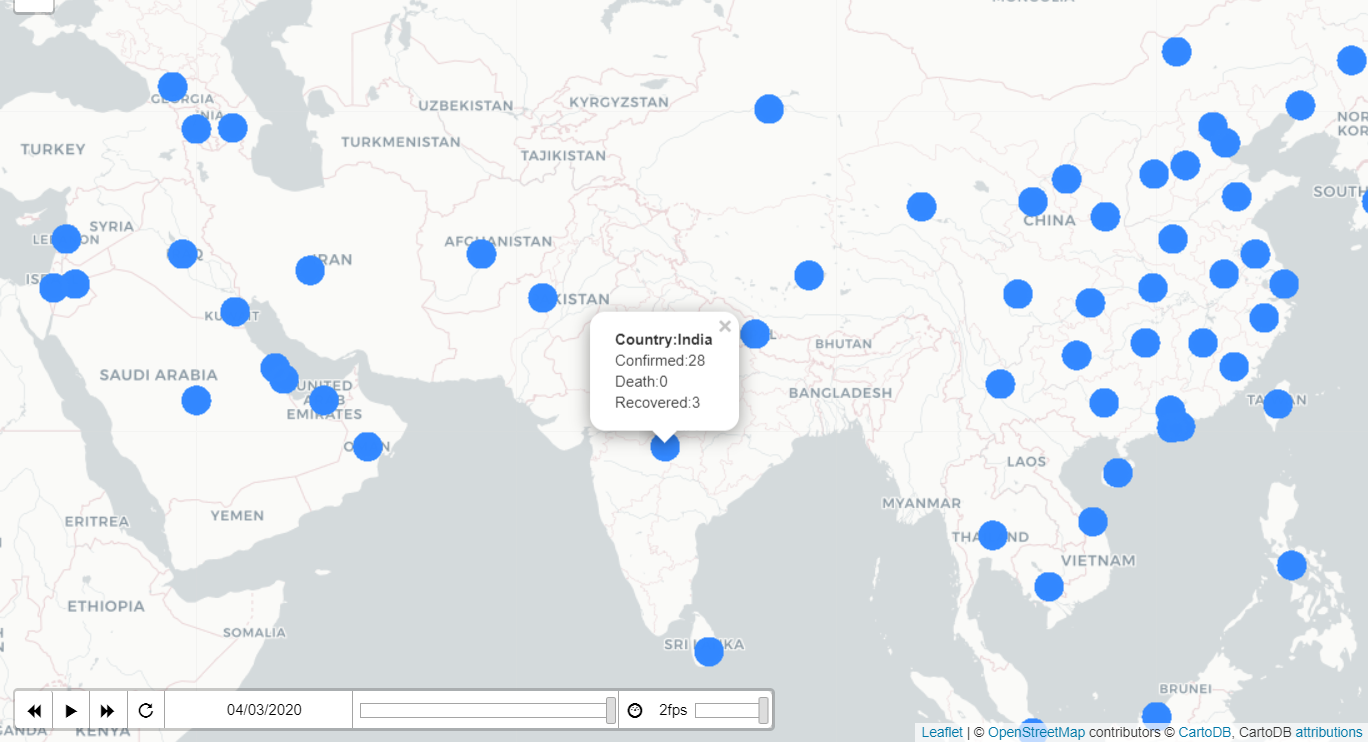]

In [10]:
features

[{'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [117.2264, 31.8257]},
  'properties': {'time': '1/23/20',
   'icon': 'circle',
   'popup': '<b>Country:Mainland China</b><br>Confirmed:9<br>Death:0<br>Recovered:0'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [116.4142, 40.1824]},
  'properties': {'time': '1/23/20',
   'icon': 'circle',
   'popup': '<b>Country:Mainland China</b><br>Confirmed:22<br>Death:0<br>Recovered:0'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [107.874, 30.0572]},
  'properties': {'time': '1/23/20',
   'icon': 'circle',
   'popup': '<b>Country:Mainland China</b><br>Confirmed:9<br>Death:0<br>Recovered:0'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordinates': [117.9874, 26.0789]},
  'properties': {'time': '1/23/20',
   'icon': 'circle',
   'popup': '<b>Country:Mainland China</b><br>Confirmed:5<br>Death:0<br>Recovered:0'}},
 {'type': 'Feature',
  'geometry': {'type': 'Point', 'coordi

#clustering
map_world = folium.Map(location=[28.7041, 77.1025], zoom_start=3)

for i in range(len(arr)):
    mc = MarkerCluster(name='1000 clustered icons',overlay=True,control=False,icon_create_function=None)
    for k in arr[i]:
        #location = COVID_confirmed['Lat'][k], COVID_confirmed['Long'][k]
        marker = folium.Marker(location=[COVID_confirmed['Lat'][k],COVID_confirmed['Long'][k]])
        popup = '<b>Country:{}</b><br>Confirmed:{}<br>Death:{}<br>Recovered:{}'.format(COVID_confirmed['Country/Region'][k],COVID_confirmed['03-04-2020'][k],COVID_death['03-04-2020'][k],COVID_recovered['03-04-2020'][k])
        folium.Popup(popup).add_to(marker)
        marker.add_to(mc)
        mc.add_to(map_world)  

## Sayōnara